<a href="https://colab.research.google.com/github/prostodema/PRACTIC/blob/main/HW_Dementiev5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
applications = '/content/drive/My Drive/Home Work (Data Analyst)/applications(2.0).csv'
industries = '/content/drive/My Drive/Home Work (Data Analyst)/industries(2.0).csv'

In [16]:
applications_df = pd.read_csv(applications)
industries_df = pd.read_csv(industries)


## **1. Loading & Data clean**

In [17]:
# 1. Loading & Data clean

applications_df = applications_df.drop_duplicates(subset='applicant_id')

In [18]:
# 'External Rating' with 0
applications_df['External Rating'].fillna(0, inplace=True)

In [19]:
# 'Education level' with “Середня”
applications_df['Education level'].fillna("Середня", inplace=True)

In [20]:
# Check
applications_df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3


# **2. Adding rating industries from industries.csv**


In [21]:
# Union
applications_df = pd.merge(applications_df, industries_df[['Industry', 'Score']], on='Industry', how='left')

In [22]:
# Check
applications_df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15


# 3. **Calculation of the application rating** **bold text**

In [23]:
applications_df['Rating'] = 0


In [78]:
# Умови для додавання балів до рейтингу
# 1. Якщо вік між 35 і 55, додається 20 балів
applications_df['Rating'] += ((applications_df['Age'] >= 35) & (applications_df['Age'] <= 55)) * 20


In [79]:
print(applications_df.columns)


Index(['Applied at', 'Amount', 'Age', 'Gender', 'Industry', 'Marital status',
       'External Rating', 'Education level', 'Location', 'applicant_id',
       'Score', 'Rating', 'Submission Week'],
      dtype='object')


In [80]:
applications_df['Applied at'] = pd.to_datetime(applications_df['Applied at'], dayfirst=True, errors='coerce')
applications_df['Rating'] += applications_df['Applied at'].dt.weekday < 5 * 20


In [81]:
# Перевіримо результат
print(applications_df['Applied at'].head())

0   2022-11-30 10:26:37
1   2022-11-30 10:26:39
2   2022-11-30 10:26:58
3   2022-11-30 10:27:31
4   2022-11-30 10:27:34
Name: Applied at, dtype: datetime64[ns]


In [82]:
applications_df['Rating'] += (applications_df['Marital status'] == 'Одружений') * 20


In [83]:
# Групування за тижнями і обчислення середнього рейтингу
weekly_avg_rating = applications_df.groupby('Submission Week')['Rating'].mean()


In [84]:
# Побудова графіка
applications_df.loc[(applications_df['Amount'].isna()) | (applications_df['External Rating'] == 0), 'Rating'] = 0


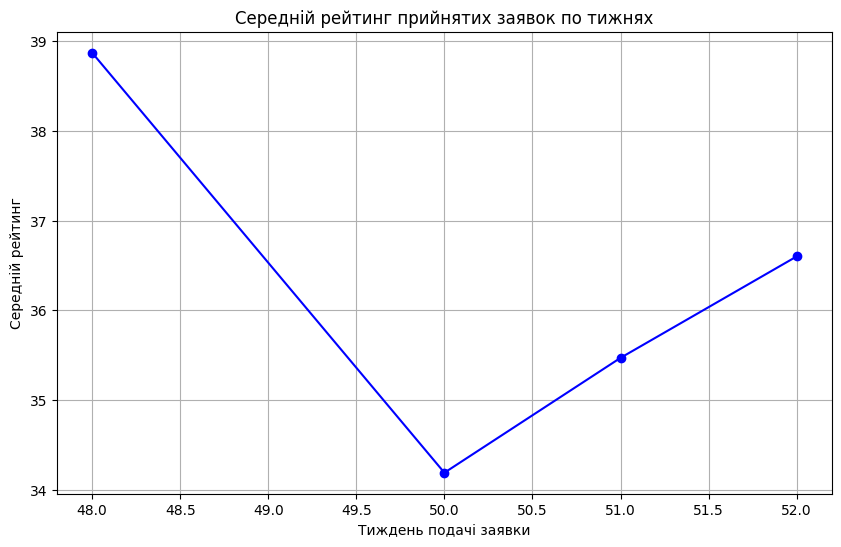

In [85]:
plt.figure(figsize=(10,6))
weekly_avg_rating.plot(kind='line', marker='o', color='b')
plt.title('Середній рейтинг прийнятих заявок по тижнях')
plt.xlabel('Тиждень подачі заявки')
plt.ylabel('Середній рейтинг')
plt.grid(True)
plt.show()

# **4. FILTER DATA**

In [87]:
# Залишаємо тільки ті заявки, які мають рейтинг більше 0
accepted_applications = applications_df[applications_df['Rating'] > 0]


In [88]:
accepted_applications.head()


,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Rating,Submission Week
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,23,48
2,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,23,48
4,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,18,48
5,2022-11-30 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15,48,48
10,2022-11-30 10:28:03,18000.0,25,Чоловік,Dating,Single,5.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,f8138219d5a95649cc85bdabeb3732ca,5,8,48


# **5 Group Data**

In [89]:
import matplotlib.pyplot as plt

In [90]:
# Додаємо стовпець для тижня подачі заявки
accepted_applications.loc[:, 'Submission Week'] = accepted_applications['Applied at'].dt.isocalendar().week

In [91]:
# Групуємо дані за тижнями та обчислюємо середній рейтинг
weekly_avg_rating = accepted_applications.groupby('Submission Week')['Rating'].mean()


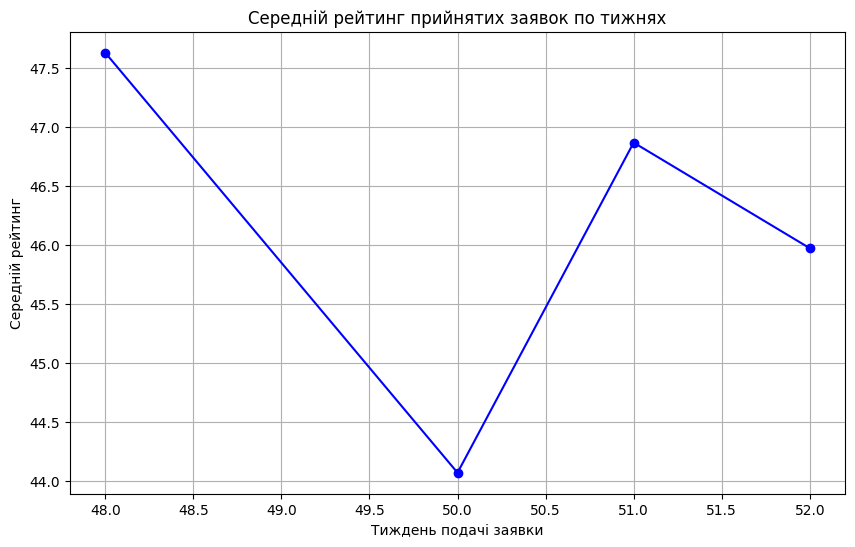

In [92]:
# Побудова графіка
plt.figure(figsize=(10,6))
weekly_avg_rating.plot(kind='line', marker='o', color='b')
plt.title('Середній рейтинг прийнятих заявок по тижнях')
plt.xlabel('Тиждень подачі заявки')
plt.ylabel('Середній рейтинг')
plt.grid(True)
plt.show()